ENG Charles p1403762

TANG Kévin p1501263

# TP0 Prise en main OpenCV - Traitements d'histogrammes


In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

## Image Couleur

In [ ]:
#Lecture du fichier
srcCouleur = cv.imread("mercedes_w13_44.jpg") #en couleur

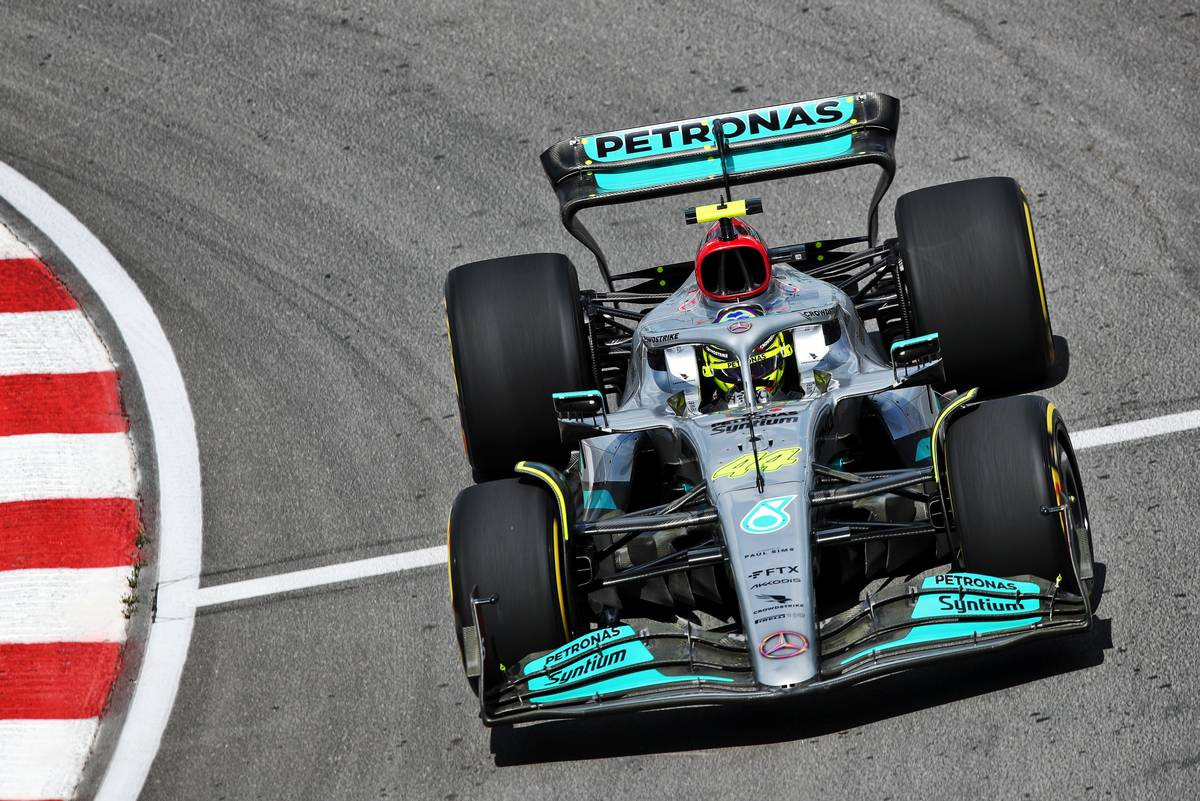

In [ ]:
#Affichage de l'image
#cv.imshow("mercedes_w13_44.jpg", src) #Pas supporté par Google Colab
cv2_imshow(srcCouleur)

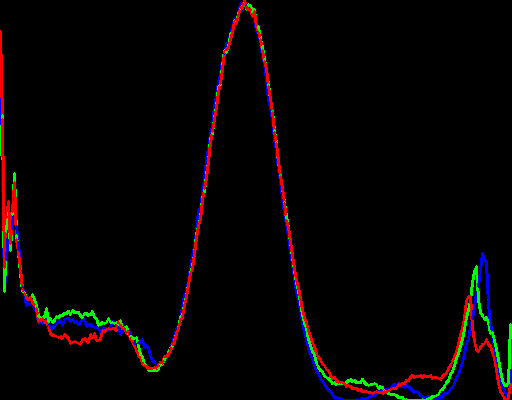

In [ ]:
#Séparation des composantes RGB
bgr_planes = cv.split(srcCouleur)

#Calcul de l'histogramme
histSize = 256
histRange = (0, 256)
accumulate = False
b_hist = cv.calcHist(bgr_planes, [0], None, [histSize], histRange, accumulate=accumulate)
g_hist = cv.calcHist(bgr_planes, [1], None, [histSize], histRange, accumulate=accumulate)
r_hist = cv.calcHist(bgr_planes, [2], None, [histSize], histRange, accumulate=accumulate)

#Affichage de l'histogramme
hist_w = 512
hist_h = 400
bin_w = int(round( hist_w/histSize ))
histImage = np.zeros((hist_h, hist_w, 3), dtype=np.uint8)

#Normalisation 
cv.normalize(b_hist, b_hist, alpha=0, beta=hist_h, norm_type=cv.NORM_MINMAX)
cv.normalize(g_hist, g_hist, alpha=0, beta=hist_h, norm_type=cv.NORM_MINMAX)
cv.normalize(r_hist, r_hist, alpha=0, beta=hist_h, norm_type=cv.NORM_MINMAX)

#Affichage des lignes de l'histogramme
for i in range(1, histSize):
    cv.line(histImage, ( bin_w*(i-1), hist_h - int(b_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(b_hist[i]) ),
            ( 255, 0, 0), thickness=2)
    cv.line(histImage, ( bin_w*(i-1), hist_h - int(g_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(g_hist[i]) ),
            ( 0, 255, 0), thickness=2)
    cv.line(histImage, ( bin_w*(i-1), hist_h - int(r_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(r_hist[i]) ),
            ( 0, 0, 255), thickness=2)

#Affichage final
cv2_imshow(histImage)

## Image Noir & Blanc

In [ ]:
#Lecture du fichier
srcNB = cv.imread("mercedes_w13_44.jpg",0) #en gris

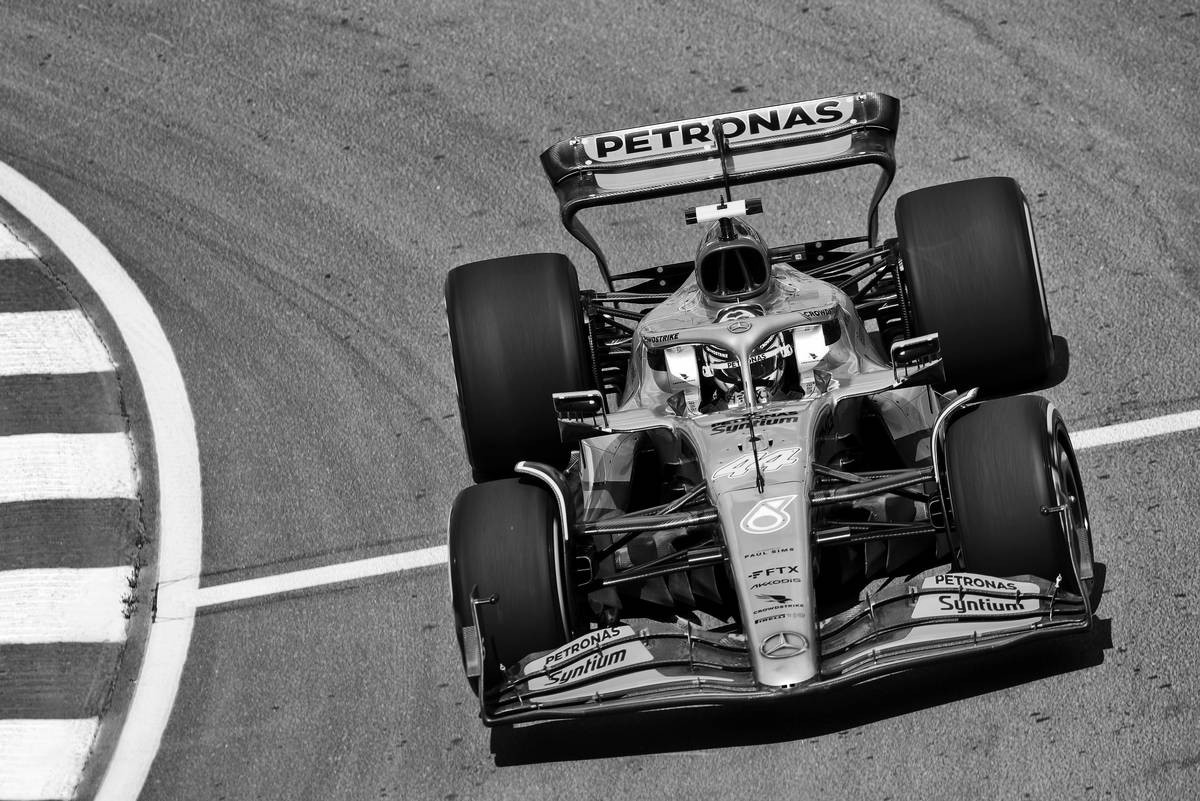

In [ ]:
#Affichage de l'image
cv2_imshow(srcNB)

In [ ]:
# Fonction de calcul de l'histogramme 
def calcul_hist(src):
  height = src.shape[0]
  width = src.shape[1]
  hist = np.zeros(256)

  for i in range(0, height):
    for j in range(0,width):
      hist[srcNB[i][j]] += 1

  return hist

In [ ]:
#Calcul de l'histogramme
histNB = calcul_hist(srcNB)
#histNB = cv.calcHist([srcNB], [0], None, [256], [0,256])

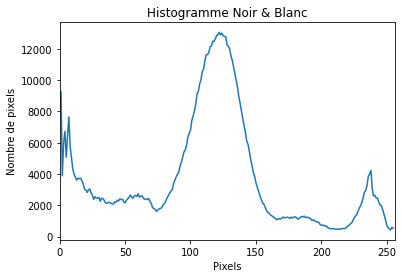

In [ ]:
#Affichage de l'histogramme
plt.figure()
plt.title("Histogramme Noir & Blanc")
plt.xlabel("Pixels")
plt.ylabel("Nombre de pixels")
plt.plot(histNB)
plt.xlim([0,256])
plt.show()

In [ ]:
#Normalisation de l'histogramme
histNB /= histNB.sum()

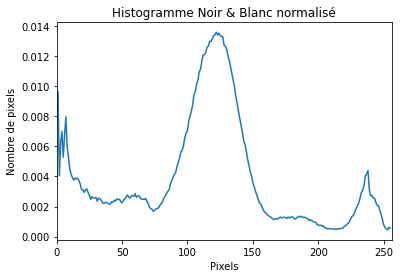

In [ ]:
#Affichage de l'histogramme
plt.figure()
plt.title("Histogramme Noir & Blanc normalisé")
plt.xlabel("Pixels")
plt.ylabel("Nombre de pixels")
plt.plot(histNB)
plt.xlim([0,256])
plt.show()

## Etirement de l'histogramme

In [ ]:
#Lecture de l'image
src = cv.imread("Tree.jpg",0) #en gris

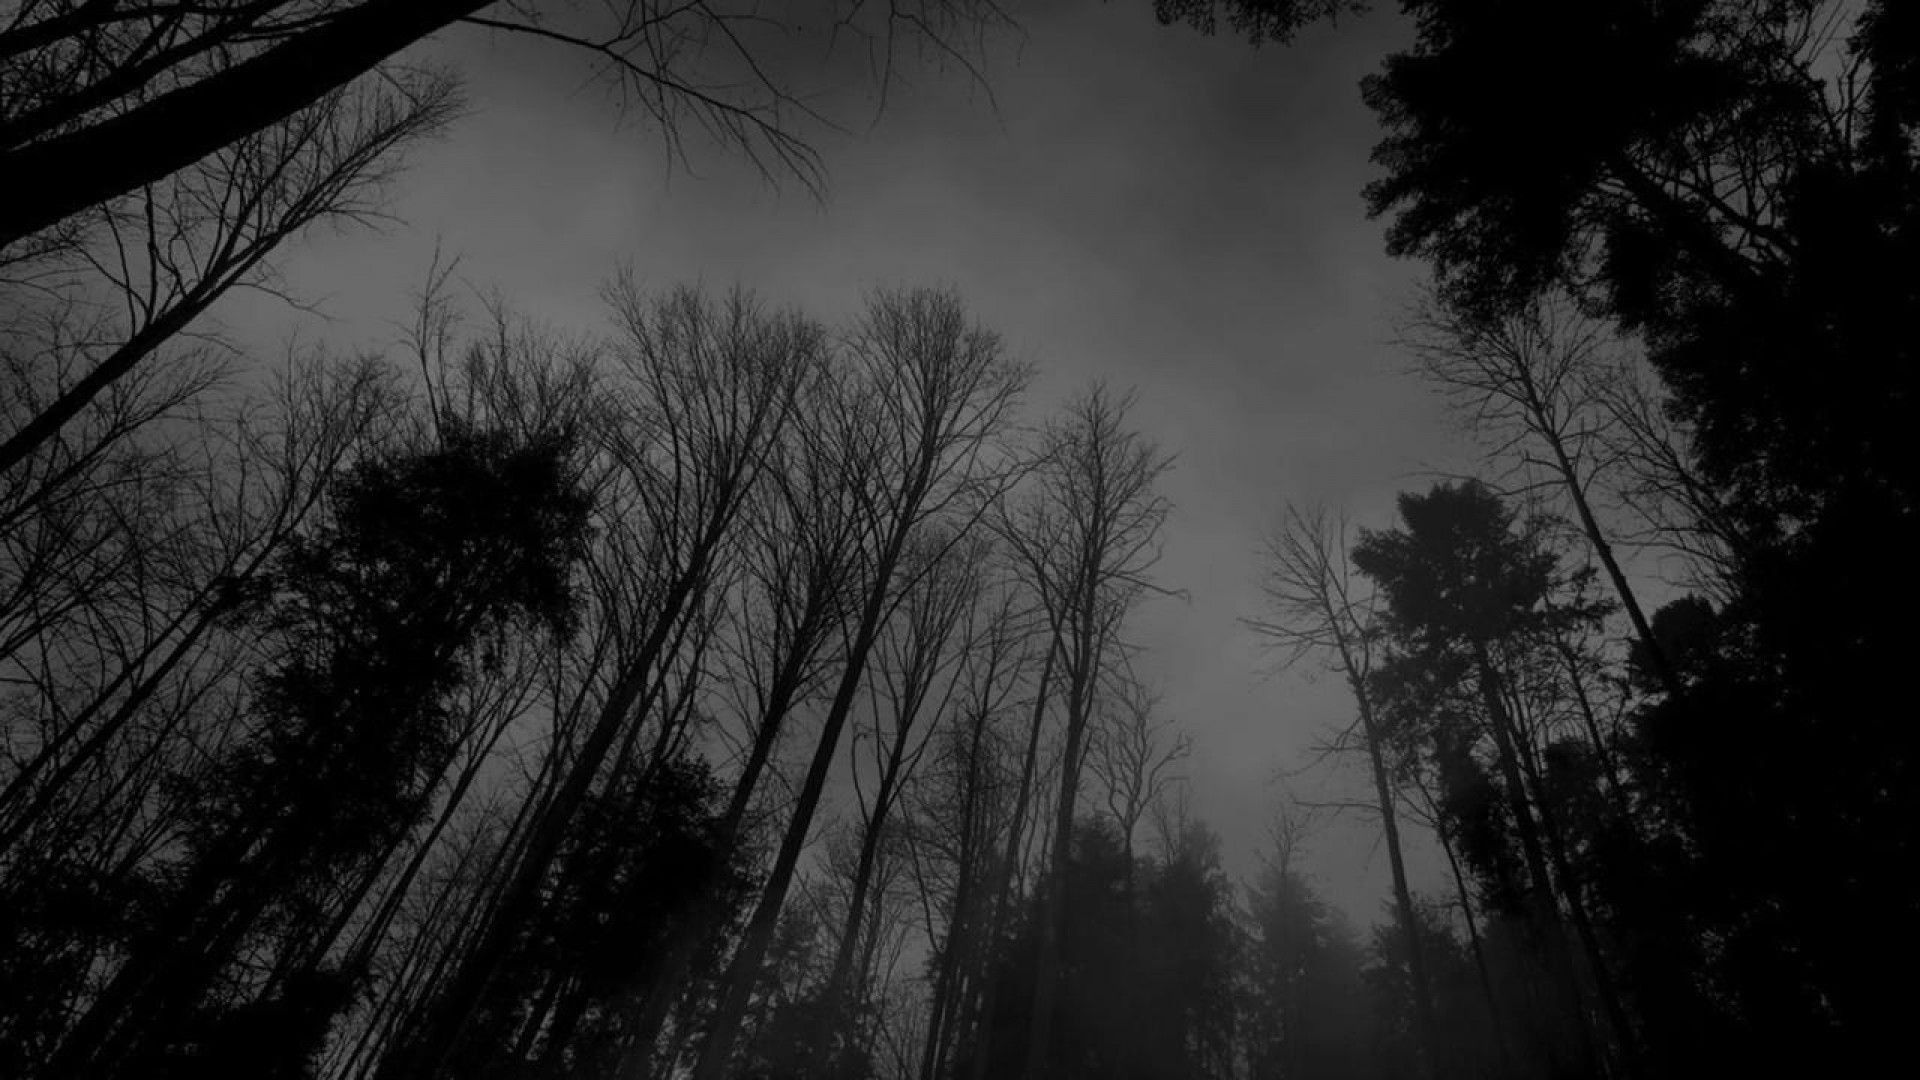

In [ ]:
#Affichage de l'image
cv2_imshow(src)

In [ ]:
#Calcul de l'histogramme
hist = cv.calcHist([src], [0], None, [256], [0,256])

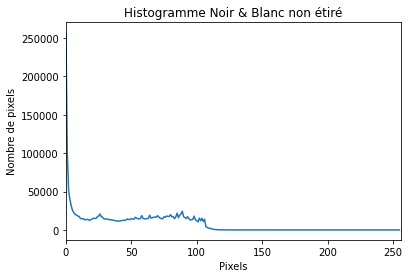

In [ ]:
#Affichage de l'histogramme
plt.figure()
plt.title("Histogramme Noir & Blanc non étiré")
plt.xlabel("Pixels")
plt.ylabel("Nombre de pixels")
plt.plot(hist)
plt.xlim([0,256])
plt.show()

In [ ]:
#Fonction de calcul de l'étirement
def calcul_etirement(src):
  #Variables
  height = src.shape[0]
  width = src.shape[1]
  pixel_a = 0
  pixel_b = 255 
  min = src.min() 
  max = src.max()

  #Formule Etirement
  for i in range(0, height):
    for j in range (0, width):
      src[i][j] = (pixel_b - pixel_a) * ( (src[i][j] - min) / (max - min) ) + pixel_a
  
  return src

In [ ]:
srcET = calcul_etirement(src)

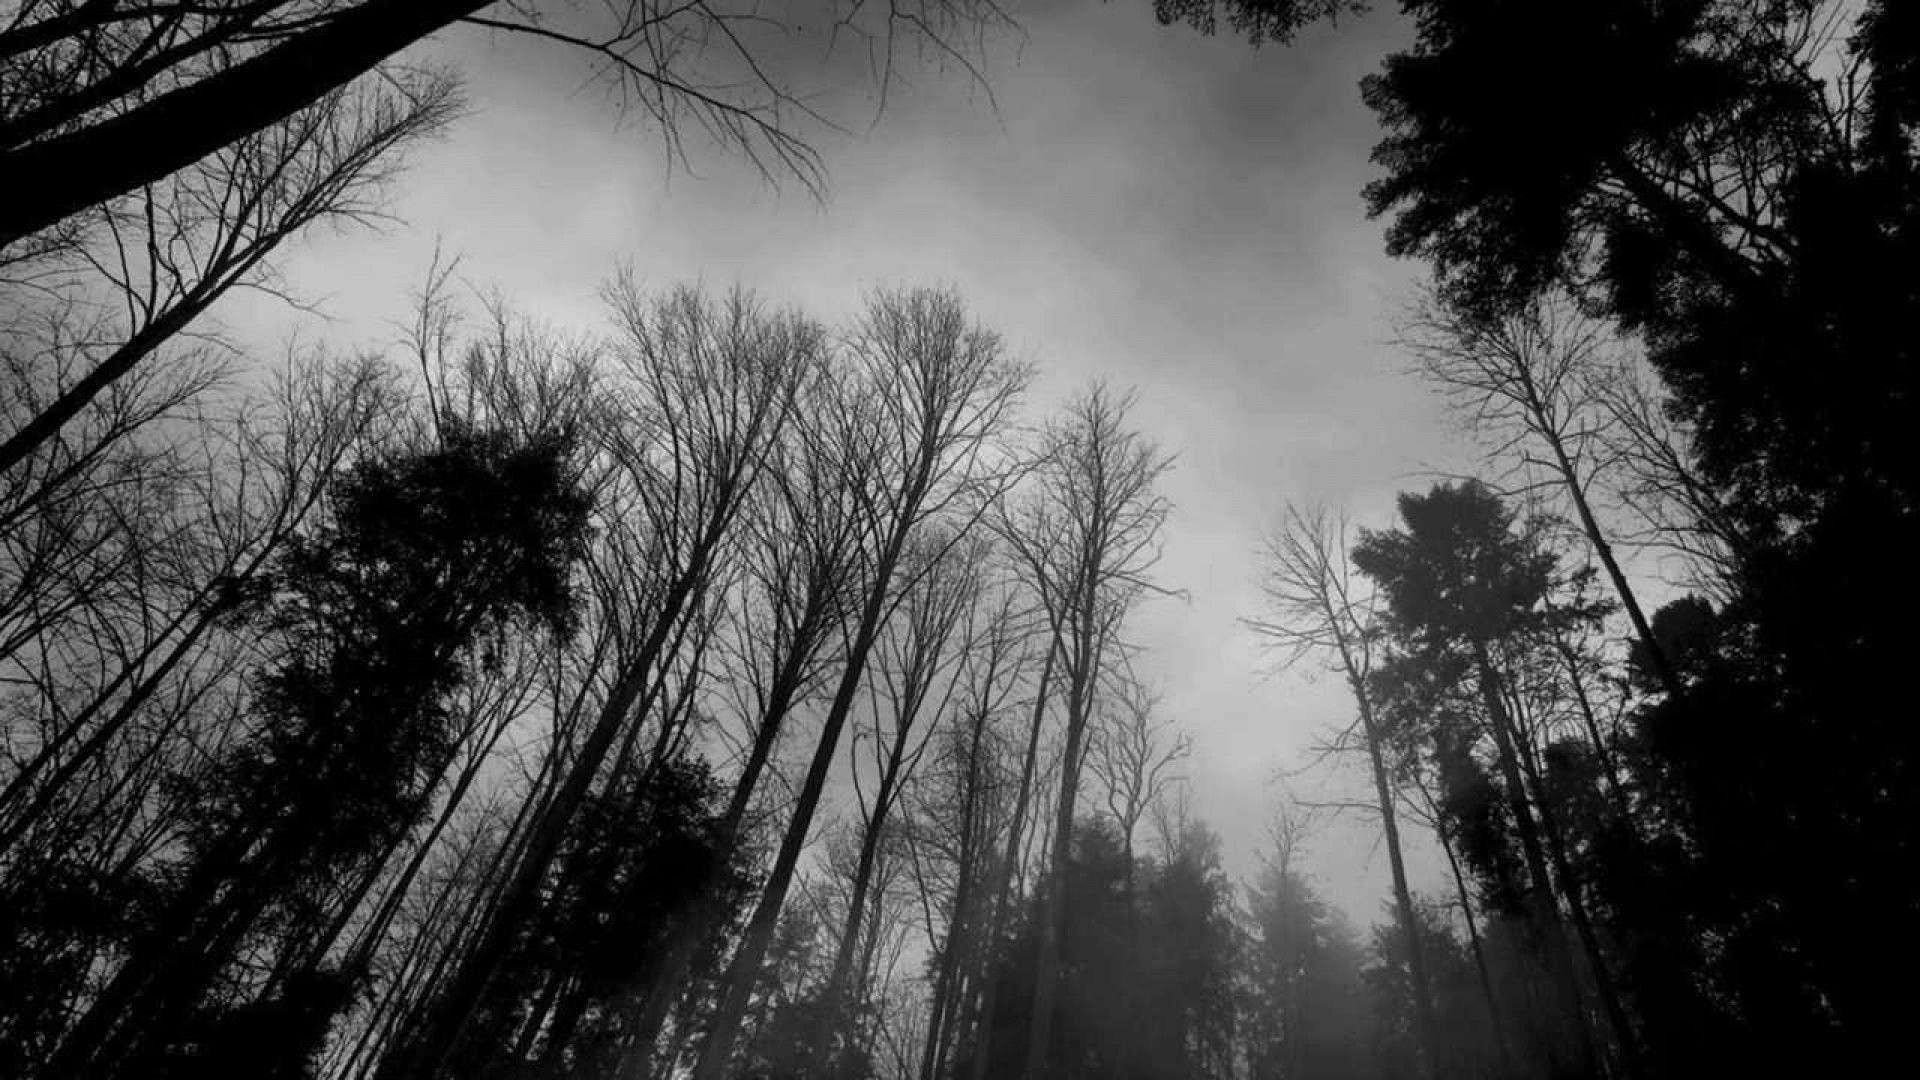

In [ ]:
#Affichage de l'image
cv2_imshow(srcET)

In [ ]:
#Calcul de l'histogramme
histET = cv.calcHist([srcET], [0], None, [256], [0,256])

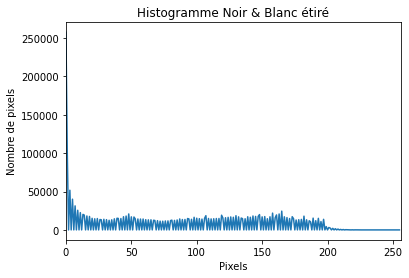

In [ ]:
#Affichage de l'histogramme
plt.figure()
plt.title("Histogramme Noir & Blanc étiré")
plt.xlabel("Pixels")
plt.ylabel("Nombre de pixels")
plt.plot(histET)
plt.xlim([0,256])
plt.show()

## Egalisation de l'histogramme

In [12]:
#Lecture de l'image
srcEG = cv.imread("mercedes_w13_44.jpg",0) #en gris

In [13]:
#Egalisation de l'image
eqHistEG = cv.equalizeHist(srcEG)

In [ ]:
#Affichage de l'image
cv2_imshow(eqHistEG)

In [14]:
#Calcul de l'histogramme
histEG = cv.calcHist([eqHistEG], [0], None, [256], [0,256])

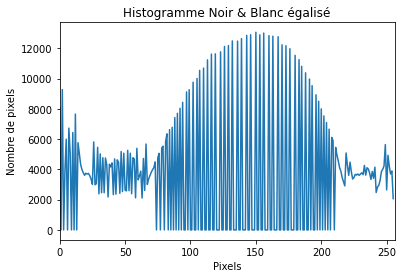

In [15]:
#Affichage de l'histogramme
plt.figure()
plt.title("Histogramme Noir & Blanc égalisé")
plt.xlabel("Pixels")
plt.ylabel("Nombre de pixels")
plt.plot(histEG)
plt.xlim([0,256])
plt.show()

In [23]:
#Fonction histogramme cumulé
def calcul_histCumule(src):
  cumulHist = np.zeros(256)
  for i in range(0,256):
    cumulHist[i] = cumulHist[i-1] + src[i]
    
  return cumulHist

In [26]:
cumulHist = calcul_histCumule(histEG)

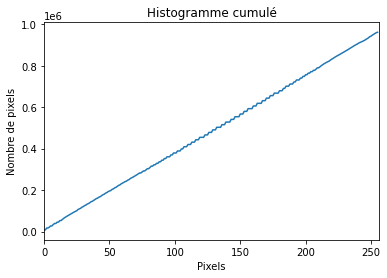

In [27]:
#Affichage de l'histogramme cumulé
plt.figure()
plt.title("Histogramme cumulé")
plt.xlabel("Pixels")
plt.ylabel("Nombre de pixels")
plt.plot(cumulHist)
plt.xlim([0,256])
plt.show()